<a href="https://colab.research.google.com/github/fish34/sberbank_data_analysis/blob/master/hw3_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib # импортируем библиотеку
import matplotlib.pyplot as plt # основной модуль
 
import numpy as np # уже знакомые нам библиотеки
import pandas as pd
 
from pandas.plotting import register_matplotlib_converters # для корректной конвертации времени
register_matplotlib_converters() 
 
import seaborn as sns # наводим красоту
sns.set_style('white')
%config InlineBackend.figure_format = 'svg'
 
%matplotlib inline

In [2]:
#!pip install 'matplotlib==3.4'
#!pip show matplotlib 

### Упражнение 1

* Реализуйте функцию `plot_horizontal_bar`, рисующую горизонтальные bar'ы

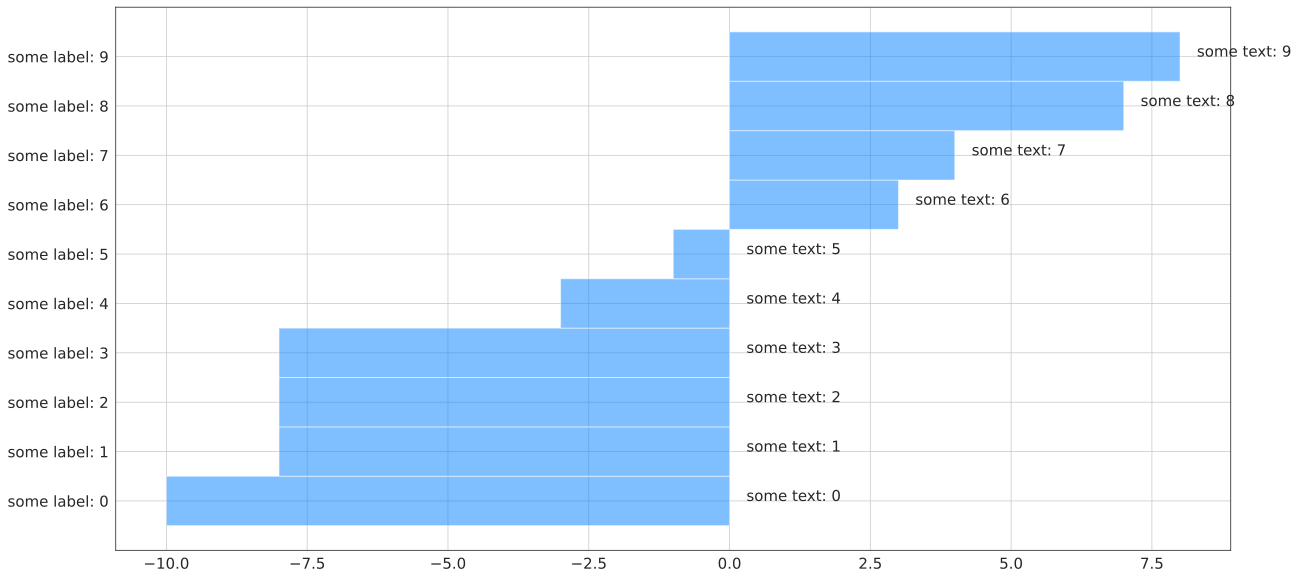

In [3]:
# Сигнатура функции и пример вывода:
 
bars_length = np.random.randint(-10, 10, 10)
bars_length.sort()
 
yticks_labels = ['some label: {}'.format(i) for i in range(10)]
labels = ['some text: {}'.format(i) for i in range(10)]
figsize = (20, 10)
 
def plot_horizontal_bar(bar_len,labels,ylabels,figsize):
  fig=plt.figure(figsize=figsize)
  hbars=plt.barh(ylabels,bar_len,height=1,color='#0080ff',alpha=0.5)
  plt.grid(True)
  ax = plt.gca()
  #ax.bar_label(hbars,labels=ylabels,label_type='edge')
  i=0
  for k,v in zip(bars_length,labels):
    if k<0:
      k=0
    plt.annotate(v,(k+0.3,i),fontsize=15)
    i+=1
  for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15) 
  for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15) 
 
plot_horizontal_bar(bars_length, labels, yticks_labels, figsize)

### Упражнение 2

* Реализуйте функцию `plot_time_probabilities`, рисующую изменяющиеся во времени вероятности неких событий.
* Cобытия для нас имеют тональность (от плохого к хорошему). Отразите ее на графике с помощью градиента по цвету.

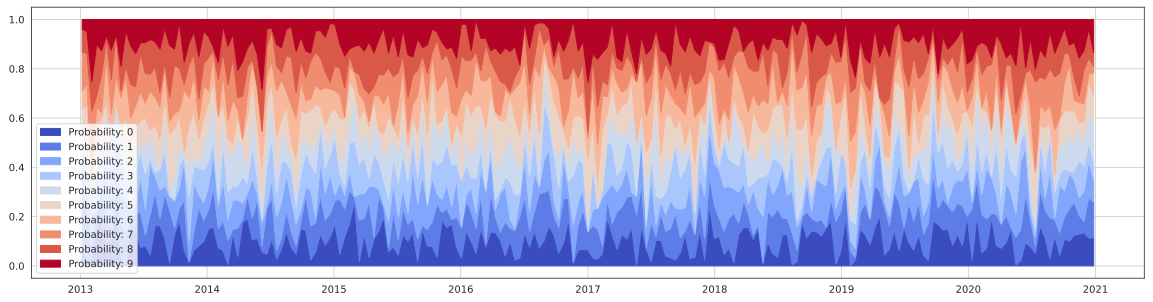

In [4]:
# Сигнатура функции и пример вывода:

dti = pd.date_range('2013-01-01', '2020-12-31', freq='2W')
probabilities_in_time = np.random.random((10, len(dti)))
probabilities_in_time = probabilities_in_time / probabilities_in_time.sum(axis=0)
probabilities_in_time = pd.DataFrame(probabilities_in_time).T
probabilities_in_time.index = dti
figsize = (20, 5)
cmap=plt.cm.coolwarm(np.linspace(0,1,10))

def plot_time_probabilities(probs, fsize, cmap):
    fig=plt.figure(figsize=figsize)
    plt.grid(True)
    upper_topic=lower_topic=0
    for i in range(10):
      upper_topic= lower_topic + probs[i]
      plt.fill_between(probs.index, lower_topic,upper_topic, label='Probability: {}'.format(i), color=cmap[i],)
      lower_topic=upper_topic
    plt.legend(loc='lower left')

plot_time_probabilities(probabilities_in_time, figsize,cmap)
#probabilities_in_time

### Упражнение 3
 
* Реализуйте функцию `plot_intraday_ts`, рисующую тепловую карту по временному ряду с внутридневными данными

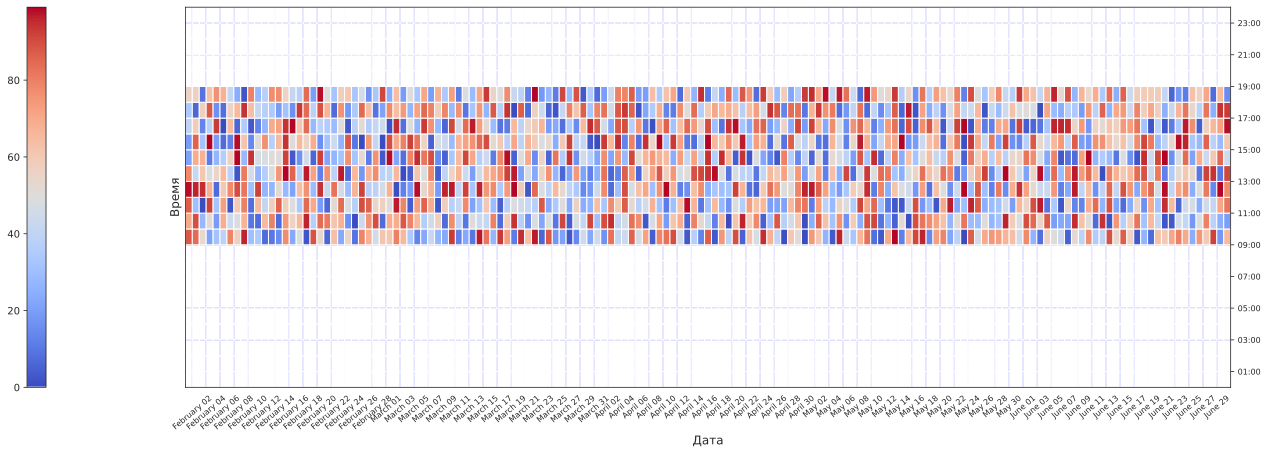

In [72]:
# Сигнатура функции и пример вывода:
 
intraday_ts = pd.Series(np.random.randint(0, 100, 3625), 
                        index=pd.date_range('2020-02-01', '2020-07-01', freq='H'))
intraday_ts.loc[(intraday_ts.index.hour < 9) | (intraday_ts.index.hour > 18)] = np.nan
figsize = (25, 7)
 
def plot_intraday_ts(ts,figsize):
  fig=plt.figure(figsize=figsize)
  ax = plt.gca()
  columns=ts.index.strftime('%B %d').unique()
  index=ts.index.strftime('%H:%M').unique()
  ts=ts[:len(ts.values)//24*24]
  data=np.array(ts).reshape(-1, 24)
  df=pd.DataFrame(data=data.T,index=index,columns=columns[:len(data)])
  df.fillna(df.mean().mean())
  cm = plt.cm.coolwarm
  cs = plt.pcolormesh(df,edgecolors = 'white', cmap = cm)
  plt.ylabel('Время', fontsize=12)
  plt.xlabel('Дата', fontsize=12)
  xticks=range(1,len(df.columns),2)
  yticks=range(1,len(df.index),2)
  ax.set_xticks(xticks)
  ax.set_xticklabels([df.columns[i] for i in xticks], rotation=40, fontsize=8)
  ax.set_yticks(yticks)
  ax.set_yticklabels([df.index[i] for i in yticks],fontsize=8)
  ax.yaxis.set_ticks_position('right')
  cb = plt.colorbar(cs ,ax = [ax], location = 'left')
  plt.grid(True,color='b') 
  plt.show()

plot_intraday_ts(intraday_ts, figsize)